In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

## File processing functionalities

In [24]:
# Metrics
def index_difficulty(d, w):
  return math.log2((2*d) / w)

def index_performance(id, mt):
  return id / mt

def get_id_col(df):
  return df.apply(lambda row: index_difficulty(row['A'], row['w']), axis=1)
# ============================================================================

# File reading / analysis
def get_name_device_mode(filename):
  name, a, b = filename.lower().split("/")[-1].split('_')[:3]

  # some file were named "name_device_mode" and some "name_mode_device"
  if a in ["tablet", "mouse"]:
    device = a
    mode = b
  else:
    device = b
    mode = a
  return name, device, mode

def analyse_file(filename):
  df = pd.read_csv(filename, skiprows=2)
  avg_click = df['clickTime'].mean()
  total_time = df['clickTime'].sum()
  errors = df['currentNumberOfErrors'].array[-1]
  name, device, mode = get_name_device_mode(filename)

  # give info for combined df
  df["device"] = device
  df["mode"] = mode

  return df, [name, device, mode, avg_click, total_time, errors]
# ============================================================================

In [25]:
# reading all csv files in "folder_name" make a table with total time / avg_click / errors
# also make combined df which contains every click data of all csv files
folder_name = 'data/'

table = []
combined_df = pd.DataFrame()
for filename in glob.glob(f'{folder_name}*.csv'):
  df, row = analyse_file(filename)
  table.append(row)
  combined_df = pd.concat([combined_df, df])

# add id metric
combined_df["ID"] = get_id_col(combined_df)

# make df from table
df = pd.DataFrame(table, columns=["Name", "Device", "Mode", "AvgTime", "Total Time", "Errors"])

In [14]:
df.sort_values(by=["Name", "Device", "Mode"])

,Name,Device,Mode,AvgTime,Total Time,Errors
5,alex,mouse,bubble,1.125529,272.378,3
40,alex,mouse,normal,1.168946,282.885,12
4,alex,tablet,bubble,1.153112,279.053,35
41,alex,tablet,normal,1.246343,301.615,45
25,ana,mouse,bubble,1.429256,345.880,1
34,ana,mouse,normal,1.238508,299.719,8
33,ana,tablet,bubble,1.350161,326.739,6
16,ana,tablet,normal,1.516591,367.015,33
6,gabriel,mouse,bubble,1.094678,264.912,3
37,gabriel,mouse,normal,1.226008,296.694,9


In [26]:
set(combined_df["ID"])

{4.0,
 4.415037499278844,
 4.584962500721156,
 5.0,
 5.415037499278844,
 5.584962500721156,
 6.0}

## Initial analysis

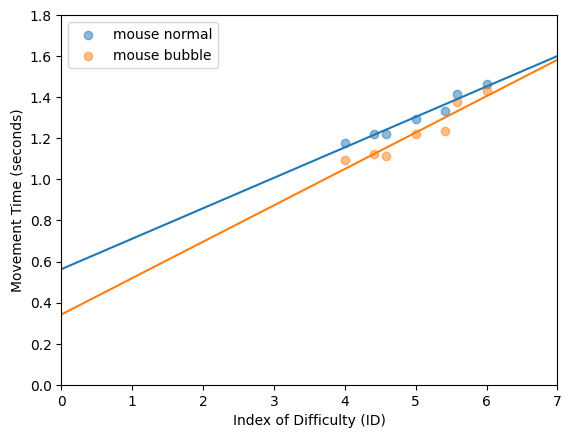

In [27]:
# x_axis = [0, 7]
# y_axis = [0, 1.8]
# tmp = combined_df.groupby(["device", "mode", "ID"]).mean()
# extended_x = np.linspace(*x_axis, 100)

# for d in ["mouse", "tablet"]:
#   for m in ["normal", "bubble"]:
#     x = tmp.T[d][m].T.index.to_numpy()
#     y = tmp.T[d][m].T["clickTime"].to_numpy()
#     plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
#     p = np.polyfit(x, y, 1)
#     plt.plot(extended_x, np.polyval(p, extended_x))#, label=f"{d} {m}")

# plt.legend()
# plt.axis(x_axis + y_axis)
# plt.xlabel("Index of Difficulty (ID)")
# plt.ylabel("Movement Time (seconds)")
# plt.show()
x_axis = [0, 7]
y_axis = [0, 1.8]
tmp = combined_df.groupby(["device", "mode", "ID"]).mean()
extended_x = np.linspace(*x_axis, 100)

for d in ["mouse"]:
  for m in ["normal", "bubble"]:
    x = tmp.T[d][m].T.index.to_numpy()
    y = tmp.T[d][m].T["clickTime"].to_numpy()
    plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
    p = np.polyfit(x, y, 1)
    plt.plot(extended_x, np.polyval(p, extended_x))#, label=f"{d} {m}")

plt.legend()
plt.axis(x_axis + y_axis)
plt.xlabel("Index of Difficulty (ID)")
plt.ylabel("Movement Time (seconds)")
plt.show()

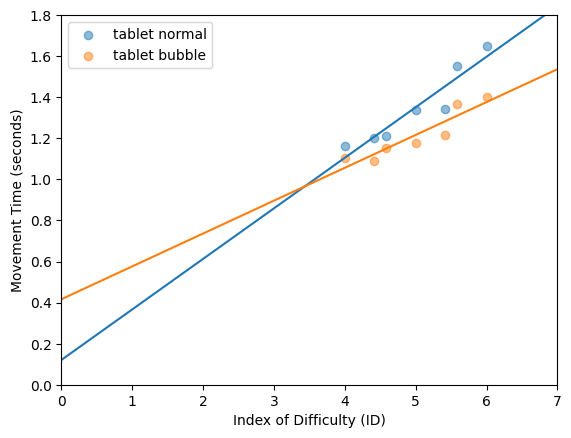

In [17]:
x_axis = [0, 7]
y_axis = [0, 1.8]
tmp = combined_df.groupby(["device", "mode", "ID"]).mean()
extended_x = np.linspace(*x_axis, 100)

for d in ["tablet"]:
  for m in ["normal", "bubble"]:
    x = tmp.T[d][m].T.index.to_numpy()
    y = tmp.T[d][m].T["clickTime"].to_numpy()
    plt.scatter(x, y, label=f"{d} {m}", alpha=0.5)
    p = np.polyfit(x, y, 1)
    plt.plot(extended_x, np.polyval(p, extended_x))#, label=f"{d} {m}")

plt.legend()
plt.axis(x_axis + y_axis)
plt.xlabel("Index of Difficulty (ID)")
plt.ylabel("Movement Time (seconds)")
plt.show()

In [28]:
# stats for groups
df.groupby(["Device", "Mode"]).describe()

AvgTime                                                    \
                count      mean       std       min       25%       50%   
Device Mode                                                               
mouse  bubble    13.0  1.226152  0.150955  1.087525  1.125529  1.143483   
       normal    13.0  1.301206  0.134487  1.168946  1.238508  1.259566   
tablet bubble    13.0  1.208339  0.142649  0.955058  1.112917  1.212285   
       normal    13.0  1.337757  0.179139  1.099004  1.212967  1.324310   

                                  Total Time              ...           \
                    75%       max      count        mean  ...      75%   
Device Mode                                               ...            
mouse  bubble  1.318632  1.545640       13.0  296.728846  ...  319.109   
       normal  1.303901  1.697496       13.0  314.891769  ...  315.544   
tablet bubble  1.314434  1.477145       13.0  292.418000  ...  318.093   
       normal  1.381178  1.720872       13.0  323.737154  ...  334.245   

                       Errors                                                \
                   max  count       mean        std   min   25%   50%   75%   
Device Mode                                                                   
mouse  bubble  374.045   13.0   8.846154  11.560321   1.0   3.0   5.0  11.0   
       normal  410.794   13.0  25.769231  18.139064   2.0   9.0  21.0  47.0   
tablet bubble  357.469   13.0  38.692308  33.584184   6.0  17.0  29.0  47.0   
       normal  416.451   13.0  77.615385  56.014192  21.0  45.0  54.0  85.0   

                      
                 max  
Device Mode           
mouse  bubble   45.0  
       normal   53.0  
tablet bubble  113.0  
       normal  203.0  

[4 rows x 24 columns]

<AxesSubplot:>

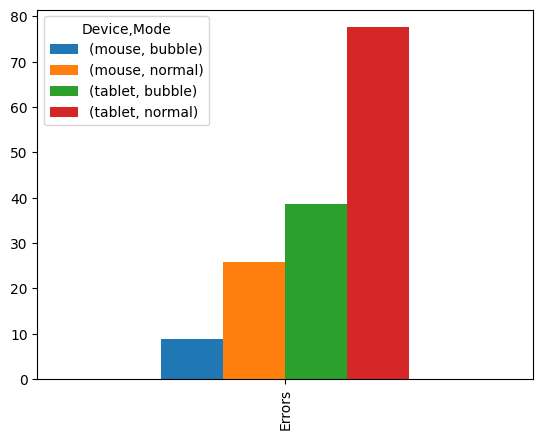

In [29]:
# plotting test
df.groupby(["Device", "Mode"])[["Errors"]].mean().T.plot.bar()

<AxesSubplot:>

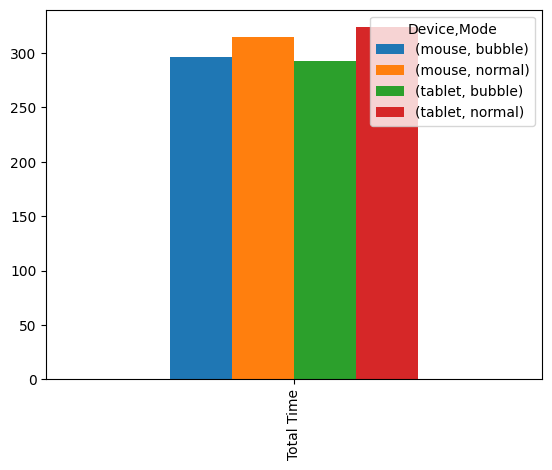

In [30]:
df.groupby(["Device", "Mode"])[["Total Time"]].mean().T.plot.bar()

## Time series over the four combinations

For each of the four combinations, (MN, MB, TN, TB) we will take the average results from the participants and plot them as the test progresses

In [66]:
import os 

device = 'mouse'
cursor = 'normal'

file_names_MN = list(filter( lambda x: "mouse" in x and "normal" in x, os.listdir("./data")))
file_names_MB = list(filter( lambda x: "mouse" in x and "bubble" in x, os.listdir("./data")))
file_names_TN = list(filter( lambda x: "tablet" in x and "normal" in x, os.listdir("./data")))
file_names_TB = list(filter( lambda x: "tablet" in x and "bubble" in x, os.listdir("./data")))


In [70]:
# make a dataframe with all times for an experiment

df_times_MN = pd.DataFrame(pd.read_csv(os.path.join("data", file_names_MN[0]), skiprows=2)["clickTime"]) 
df_times_MB = pd.DataFrame(pd.read_csv(os.path.join("data", file_names_MB[0]), skiprows=2)["clickTime"])
df_times_TN = pd.DataFrame(pd.read_csv(os.path.join("data", file_names_TN[0]), skiprows=2)["clickTime"])
df_times_TB = pd.DataFrame(pd.read_csv(os.path.join("data", file_names_TB[0]), skiprows=2)["clickTime"])

df_times_MN.rename(columns={"clickTime": "clickTime0"}, inplace= True) 
df_times_MB.rename(columns={"clickTime": "clickTime0"}, inplace= True) 
df_times_TN.rename(columns={"clickTime": "clickTime0"}, inplace= True) 
df_times_TB.rename(columns={"clickTime": "clickTime0"}, inplace= True) 

for i in range(1, len(file_names)):
    # d= pd.DataFrame(pd.read_csv(os.path.join("data", file_names[0]), skiprows=2)["clickTime"])
    # d.rename(columns={"clickTime": "clickTime{0}".format(i)}, inplace= True)
    df_times_MN["clickTime{0}".format(i)] = pd.read_csv(os.path.join("data", file_names_MN[i]), skiprows=2)["clickTime"] 
    df_times_MB["clickTime{0}".format(i)] = pd.read_csv(os.path.join("data", file_names_MB[i]), skiprows=2)["clickTime"] 
    df_times_TN["clickTime{0}".format(i)] = pd.read_csv(os.path.join("data", file_names_TN[i]), skiprows=2)["clickTime"] 
    df_times_TB["clickTime{0}".format(i)] = pd.read_csv(os.path.join("data", file_names_TB[i]), skiprows=2)["clickTime"] 


# df_times_mouse_normal


Text(0.5, 1.0, 'Tablet Bubble')

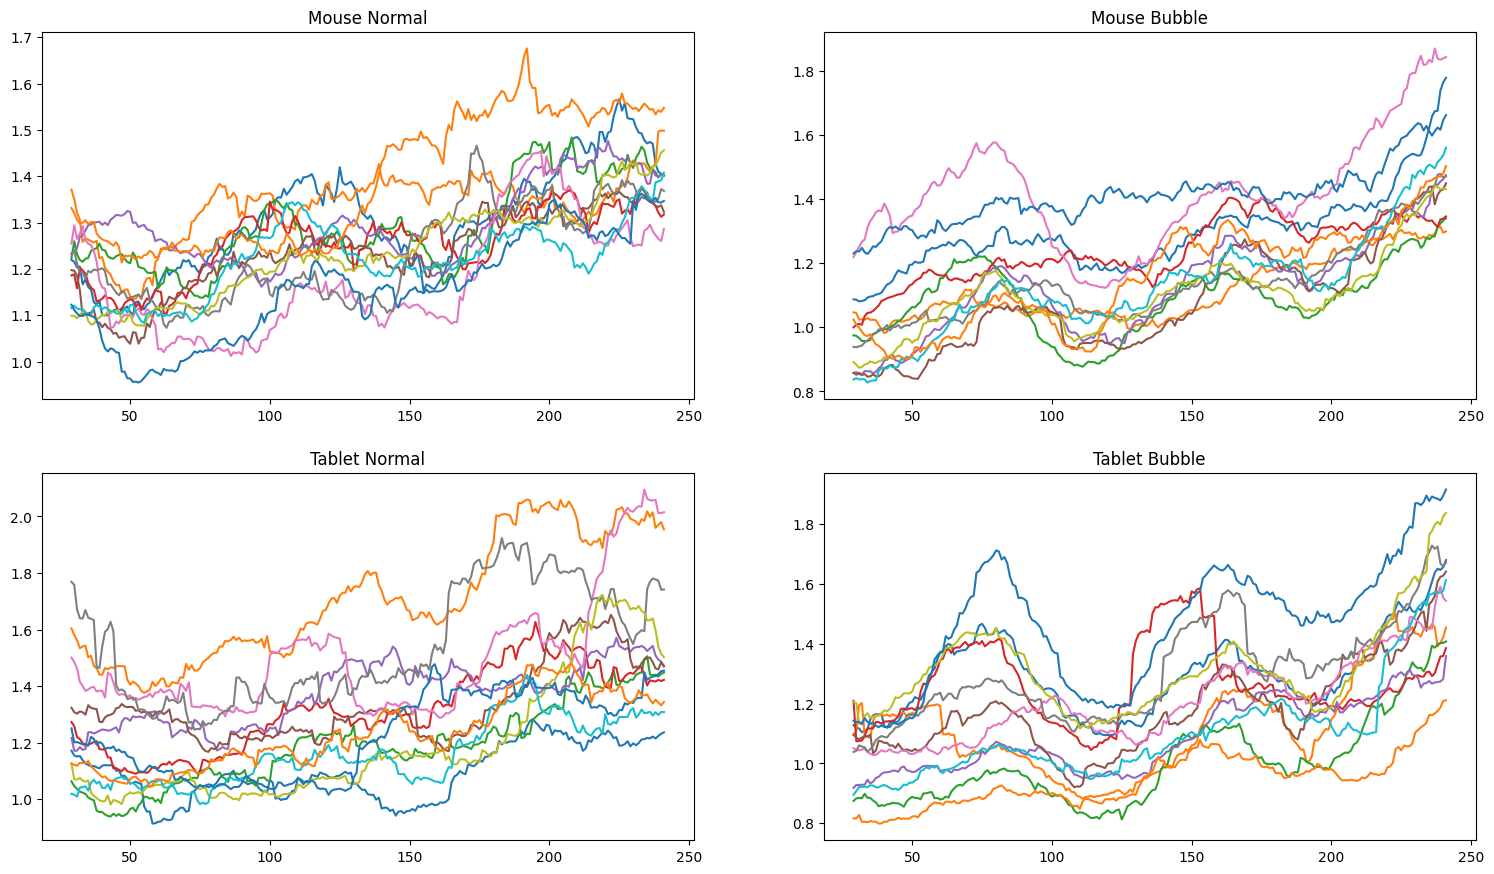

In [76]:
# Q: What happens when I print all the times of the pariticipants?
# A: A mess lol

fig, ax = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)

for i in range(len(file_names_MB)):
    ax[0][0].plot(df_times_MN["clickTime{0}".format(i)].rolling(30).mean()) 
    ax[0][1].plot(df_times_MB["clickTime{0}".format(i)].rolling(30).mean())
    ax[1][0].plot(df_times_TN["clickTime{0}".format(i)].rolling(30).mean())
    ax[1][1].plot(df_times_TB["clickTime{0}".format(i)].rolling(30).mean())


ax[0][0].set_title("Mouse Normal")
ax[0][1].set_title("Mouse Bubble")
ax[1][0].set_title("Tablet Normal")
ax[1][1].set_title("Tablet Bubble")





So plotting the data with a rolling mean highlights only the trends of the data. 
1. The normal versions do get progressively slower, as by the end the test becomes more difficult (smaller and more crowded targets)
2. The bubble versions, for both devices, have a peak in click time, then the clicktime becomes slower as the targets get more crowded   

In [77]:
# Get the mean time for experiment for all participants 

df_times_MN["meanClickTime"] = df_times_MN.mean(axis=1)
df_times_MB["meanClickTime"] = df_times_MB.mean(axis=1)
df_times_TN["meanClickTime"] = df_times_TN.mean(axis=1)
df_times_TB["meanClickTime"] = df_times_TB.mean(axis=1)



Text(0.5, 1.0, 'The mean click times for the four combinations')

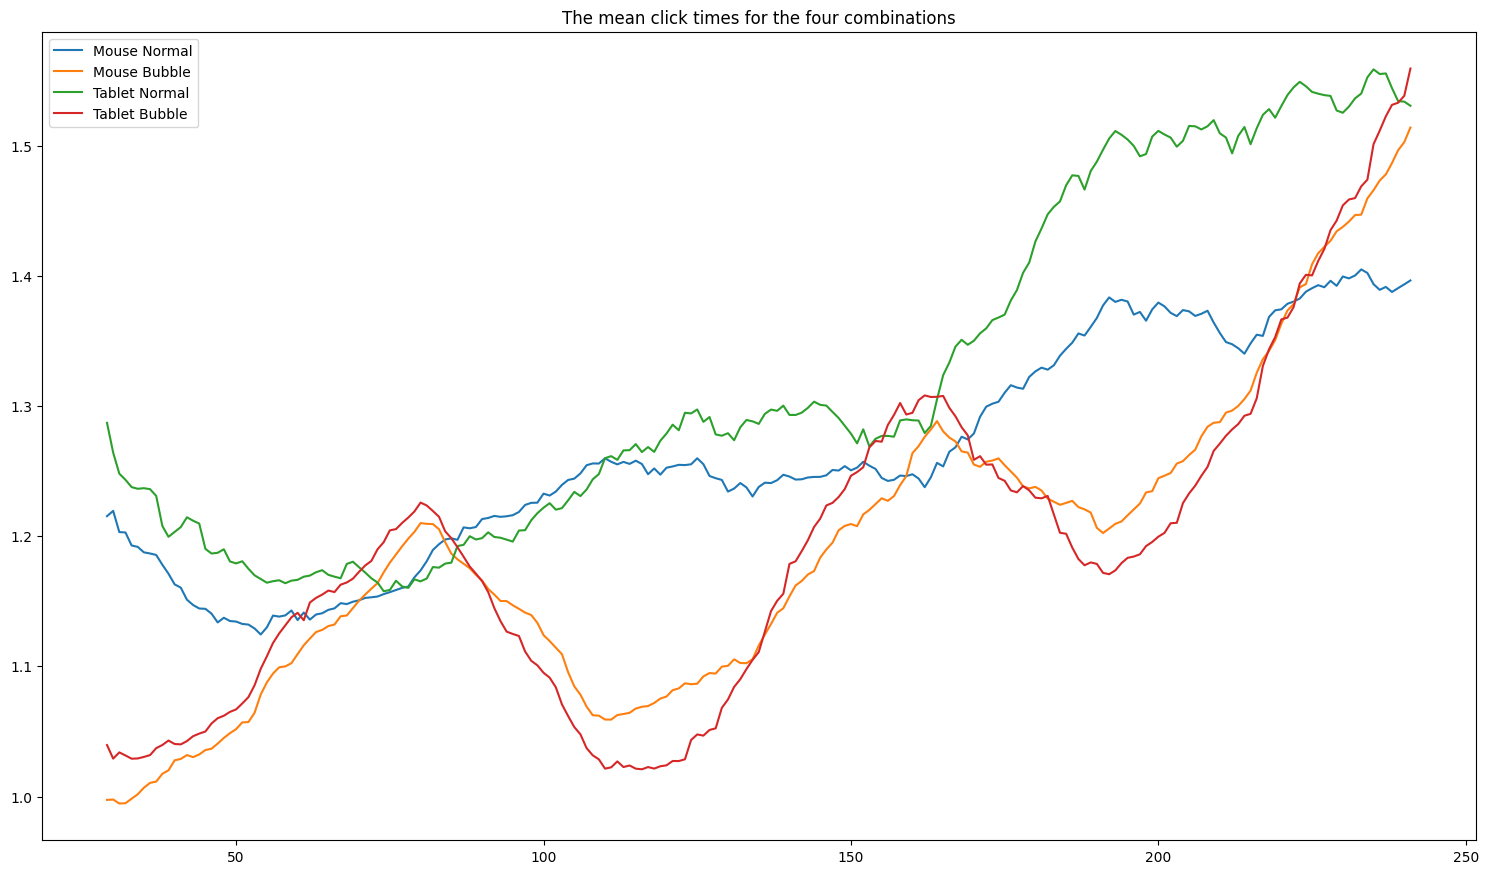

In [79]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

ax.plot(df_times_MN["meanClickTime"].rolling(30).mean(), label="Mouse Normal")
ax.plot(df_times_MB["meanClickTime"].rolling(30).mean(), label="Mouse Bubble")
ax.plot(df_times_TN["meanClickTime"].rolling(30).mean(), label="Tablet Normal")
ax.plot(df_times_TB["meanClickTime"].rolling(30).mean(), label="Tablet Bubble")

ax.legend()
ax.set_title("The mean click times for the four combinations")

